# Exploring Eigenvalues and Eigenvectors: A PCA Approach

* Bu projede, Eigenvalues ve Eigenvectors konusunu basitçe uygulayıp anlayabilmek için  Iris veri seti kullandık. PCA yöntemiyle boyut azaltma gerçekleştirildi. Iris veri seti, üç farklı çiçek türü (Setosa, Versicolor ve Virginica) için dört özellik (sepal uzunluğu, sepal genişliği, petal uzunluğu ve petal genişliği) içermektedir. Veri seti, her çiçek türü için 50 örnekten oluşmaktadır ve toplamda 150 örnek barındırmaktadır. Sonuç olarak veri setindeki farklı çiçek türlerinin belirgin şekilde ayrılabildiğini gösterdik.

* Eigenvalues ve Eigenvectors, lineer cebir ve matris teorisinde önemli kavramlardır.
Bir matrisin özelliklerini anlamak ve sistem dinamiği, kuantum mekaniği, makine öğrenimi gibi alanlarda kullanılırlar.


* Principal Component Analysis (PCA): Verilerin boyutunu azaltmak için özdeğer ve özvektörlerden yararlanılır.yüksek boyutlu veriyi daha düşük boyutlu bir uzaya indirgemek için eigenvector ve eigenvector kullanır.

* Eigenvalues ve Eigenvectors, PCA'nın temelini oluşturan matematiksel kavramlardır. PCA, bu kavramları kullanarak veri setlerindeki en önemli bilgileri ortaya çıkarmaya çalışır.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
df_new = pd.get_dummies(df, drop_first=True)
# scaler works only numeric values so  encod the data

In [24]:
df_new.head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,False,False
1,4.9,3.0,1.4,0.2,False,False
2,4.7,3.2,1.3,0.2,False,False
3,4.6,3.1,1.5,0.2,False,False
4,5.0,3.6,1.4,0.2,False,False


In [5]:
x=df_new

In [6]:
scaler=StandardScaler()

In [7]:
x_scaled=scaler.fit_transform(x)

In [9]:
# 3. Kovaryans matrisini hesapla
cov_matrix = np.cov(x_scaled, rowvar=False)
# NumPy kütüphanesinin kovaryans matrisini hesaplamak için kullanılan fonksiyonu.
# rowvar=False: Bu parametre, her sütunun bir değişkeni temsil ettiğini belirtir. Eğer True olsaydı, her satır bir değişken olarak kabul edilirdi.

* Kovaryans matrisi 
veri setindeki değişkenler arasındaki ilişkileri anlamak için kullanılan bir matristir. Her bir değişkenin nasıl birlikte değiştiğini gösterir. Özellikle makine öğreniminde, veri analizi ve boyut azaltma tekniklerinde önemlidir. Eğer iki değişkenin kovaryansı pozitifse, biri arttığında diğeri de artma eğilimindedir. Negatif bir kovaryans ise, bir değişken artarken diğerinin azalma eğiliminde olduğunu gösterir.

* Kovaryans matrisi hesaplarken normalizasyon işlemi sonrası elde edilen X_scaled matrisini kullanırız. Bu matris, her bir sütunun bir özelliği (değişkeni) temsil ettiği bir veri setidir.
* NumPy kütüphanesindeki np.cov fonksiyonu, bu işlemi otomatik olarak gerçekleştirir.
* rowvar=False parametresi, her bir sütunun bir değişkeni temsil ettiğini belirtir. Yani, gözlemler satırlarda, özellikler sütunlarda yer alır.

In [10]:
# 4. Eigenvalue ve Eigenvector hesapla
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

"""
np.linalg.eig(...): NumPy'nin lineer cebir modülünde bulunan bir fonksiyondur. 
Bu fonksiyon, bir kare matrisin özdeğerlerini ve özvektörlerini hesaplar.
cov_matrix: Hesaplanan kovaryans matrisidir. Özdeğer ve özvektörleri bulmak için kullanılır.
Verinin hangi yönlerinin en fazla varyansa sahip olduğunu belirlemek için kritik öneme sahiptir.
"""

In [11]:
# 5. Özdeğerleri sıralama
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

* Özdeğerlerin sıralanması, PCA (Principal Component Analysis) sürecinde önemli bir adımdır. Bu adım, hangi yönlerin (özvektörlerin) veride en fazla varyansı temsil ettiğini belirlemek için kullanılır.

In [12]:
# 6. İlk iki özvektörü seç
selected_vectors = sorted_eigenvectors[:, :2]

* En büyük özdeğerlere karşılık gelen özvektörler, veri setindeki en fazla değişkenliği (varyansı) temsil eder. Genellikle ilk birkaç özvektör, verinin yapısını en iyi şekilde yansıtır.

In [13]:
# 7. Veriyi dönüştür
x_pca = x_scaled.dot(selected_vectors)

C:\Users\İdeaPad\AppData\Local\Temp\ipykernel_1744\367742655.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_pca[:, 0], x_pca[:, 1], c=color_values, cmap='viridis')


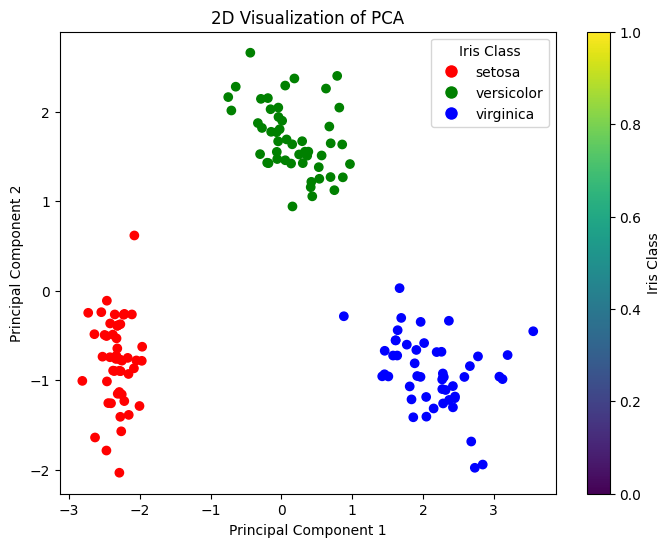

In [26]:
# Create a mapping for colors based on species
colors = {
    'setosa': 'red',
    'versicolor': 'green',
    'virginica': 'blue'
}

# Map species to colors
species = df['species']  # Assuming 'species' is the original species column in df
color_values = species.map(colors)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=color_values, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of PCA')

# Create a legend
legend_labels = list(colors.keys())
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
plt.legend(handles, legend_labels, title='Iris Class')
plt.colorbar(label='Iris Class')
plt.show()

In [2]:
# modelleme

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42) # karar ağaçlarının sayısını belirledi
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
pred = model.predict(x_test)

In [33]:
accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
# model %100 başarı verdi, overfitting olabilir, çapraz doğrulama yapmalı

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score

In [36]:
cv_scores = cross_val_score(model, x_pca, y, cv=5)  # 5 katlı çapraz doğrulama

# 7. Sonuçları Yazdırma
print("Çapraz Doğrulama Sonuçları:", cv_scores)
print("Ortalama Doğruluk:", np.mean(cv_scores))

Çapraz Doğrulama Sonuçları: [1.         1.         1.         1.         0.96666667]
Ortalama Doğruluk: 0.9933333333333334


In [4]:
# her katmanda %100 doğruluk elde etmiş, 5.katmanda 0.9933333333333334 yani model %96 başarılı

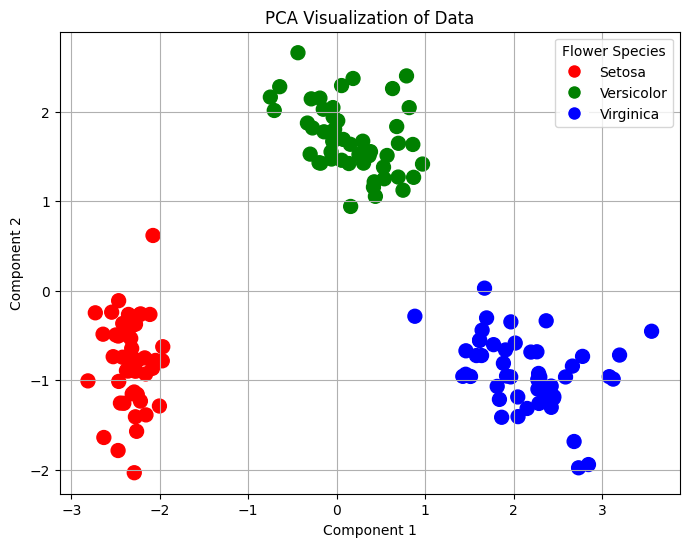

In [40]:
colors = {
    'setosa': 'red',
    'versicolor': 'green',
    'virginica': 'blue'
}
y_series = pd.Series(y)
color_values = y_series.map(colors)
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=color_values, s=100)  # s=100 ile noktaların boyutunu artırabilirsiniz
plt.title('PCA Visualization of Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Setosa', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Versicolor', markerfacecolor='green', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Virginica', markerfacecolor='blue', markersize=10)],
           title='Flower Species')
plt.grid()
plt.show()